Melakukan import libraries yang dibutukan

In [1]:
import pandas as pd
import tensorflow as tf

In [2]:
data=pd.read_excel('./selenagomez_clean.xlsx')
del data['Unnamed: 0']
data

,created_at,username,text,preprocessed,sentiment
0,Thu Mar 02 23:59:30 +0000 2023,darkonsun,social media is a disease and this hailey bieb...,social media diseas hailey bieber selena gomez...,Neutral
1,Thu Mar 02 23:56:18 +0000 2023,babyyyannieee,Justin Bieber &amp; Selena Gomez followed each...,justin bieber amp selena gomez follow twitter ...,Neutral
2,Thu Mar 02 23:55:57 +0000 2023,likabeast101,Selena Gomez drove by my house 🙀,selena gomez drive hous,Neutral
3,Thu Mar 02 23:55:36 +0000 2023,whoismelanyway,I understand hailey Bieber because if my husba...,understand hailey bieber husband ex selena gom...,Neutral
4,Thu Mar 02 23:54:50 +0000 2023,_mayyraa,but then i always realize because SELENA GOMEZ...,alway realiz selena gomez alway look good,Positive
...,...,...,...,...,...
5201,Wed Mar 01 10:19:04 +0000 2023,SAFFAOnAirRadio,"@SAFFAOnAirRadio is now playing, Selena Gomez,...",saffaonairradio play selena gomez marshmello w...,Positive
5202,Wed Mar 01 10:19:01 +0000 2023,tshepiixx,Go follow Selena Gomez on IG 😡,go follow selena gomez ig,Neutral
5203,Wed Mar 01 10:17:59 +0000 2023,Chief_I_H8_U,@Ricius496 @endlessbonerz Selena Gomez has a m...,riciu endlessbonerz selena gomez medic issu st...,Neutral
5204,Wed Mar 01 10:15:42 +0000 2023,vinalraswati,I still can taste it and i hate it. \n\nPeople...,still tast hate peopl know selena gomez,Negative


In [3]:
data=data[['preprocessed','sentiment']]
data

,preprocessed,sentiment
0,social media diseas hailey bieber selena gomez...,Neutral
1,justin bieber amp selena gomez follow twitter ...,Neutral
2,selena gomez drive hous,Neutral
3,understand hailey bieber husband ex selena gom...,Neutral
4,alway realiz selena gomez alway look good,Positive
...,...,...
5201,saffaonairradio play selena gomez marshmello w...,Positive
5202,go follow selena gomez ig,Neutral
5203,riciu endlessbonerz selena gomez medic issu st...,Neutral
5204,still tast hate peopl know selena gomez,Negative


In [4]:
data.sentiment = pd.Categorical(pd.factorize(data.sentiment)[0])
data

C:\Users\ASUS\AppData\Local\Temp\ipykernel_15868\1650668707.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.sentiment = pd.Categorical(pd.factorize(data.sentiment)[0])


,preprocessed,sentiment
0,social media diseas hailey bieber selena gomez...,0
1,justin bieber amp selena gomez follow twitter ...,0
2,selena gomez drive hous,0
3,understand hailey bieber husband ex selena gom...,0
4,alway realiz selena gomez alway look good,1
...,...,...
5201,saffaonairradio play selena gomez marshmello w...,1
5202,go follow selena gomez ig,0
5203,riciu endlessbonerz selena gomez medic issu st...,0
5204,still tast hate peopl know selena gomez,2


In [5]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [6]:
max_len=15
trunc_type = 'post'
padding_type = 'post'
oov_tok = "<OOV>"
tokenizer=Tokenizer(oov_token=oov_tok)
tokenizer.fit_on_texts(data['preprocessed'])

In [7]:
len(tokenizer.word_index)

6995

In [8]:
sequences=tokenizer.texts_to_sequences(data['preprocessed'])
padded=pad_sequences(sequences=sequences,padding=padding_type,truncating=trunc_type,maxlen=max_len)
temp=0
kamus={}
for item in sequences:
    coba=len(item)
    if coba not in kamus:
        kamus[coba]=1
    else:
        kamus[coba]+=1

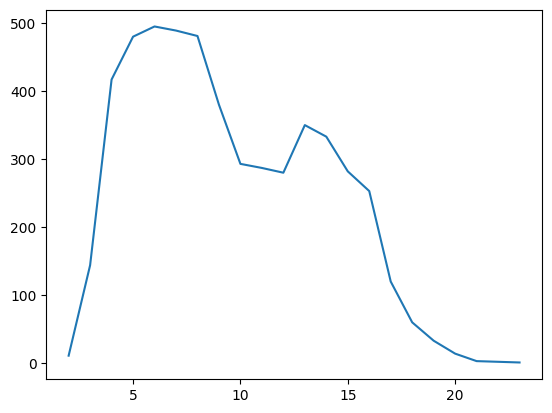

In [9]:
import matplotlib.pylab as plt

lists = sorted(kamus.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.plot(x, y)
plt.show()

In [10]:
sequences=tokenizer.texts_to_sequences(data['preprocessed'])
padded=pad_sequences(sequences=sequences,padding=padding_type,truncating=trunc_type,maxlen=max_len)

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(padded,data['sentiment'],test_size=0.1,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((4685, 15), (521, 15), (4685,), (521,))

In [12]:
y_train= tf.keras.utils.to_categorical(y_train, num_classes=3)
y_test= tf.keras.utils.to_categorical(y_test, num_classes=3)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((4685, 15), (521, 15), (4685, 3), (521, 3))

In [13]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [14]:
def createSimpleModel(optimizer):
    model=tf.keras.models.Sequential([
            tf.keras.layers.Embedding(len(tokenizer.word_index),16,input_length=max_len),
            tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,return_sequences=True,activation='relu')),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(3, activation='softmax')
        ])
    model.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=['accuracy',f1_m])
    model.summary()
    return model

In [15]:
def createComplexModel(optimizer):
    model=tf.keras.models.Sequential([
        tf.keras.layers.Embedding(len(tokenizer.word_index),128,input_length=max_len),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128,return_sequences=True,activation='relu',dropout=0.2)),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128,return_sequences=True,activation='relu',dropout=0.2)),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128,return_sequences=True,activation='relu',dropout=0.2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512,activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(3,activation='softmax')
        ])
    model.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=['accuracy',f1_m])
    model.summary()
    return model

In [16]:
callback = tf.keras.callbacks.EarlyStopping(
    monitor="val_accuracy",
    min_delta=0,
    patience=5,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
)

In [17]:
optimizer=['adam','rmsprop']
result=[]
models=[]
for item in optimizer:
    print('Train model with {} optimizer'.format(item))
    model=createSimpleModel(optimizer=item)
    history=model.fit(x_train,y_train,epochs=20,validation_split=0.1,callbacks=[callback])
    models.append(model)
    result.append(history)

Train model with adam optimizer
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 15, 16)            111920    
                                                                 
 bidirectional (Bidirectiona  (None, 15, 128)          41472     
 l)                                                              
                                                                 
 flatten (Flatten)           (None, 1920)              0         
                                                                 
 dense (Dense)               (None, 3)                 5763      
                                                                 
Total params: 159,155
Trainable params: 159,155
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
132/132 [==============================] - 19s 107ms/step - loss: 0.9073 

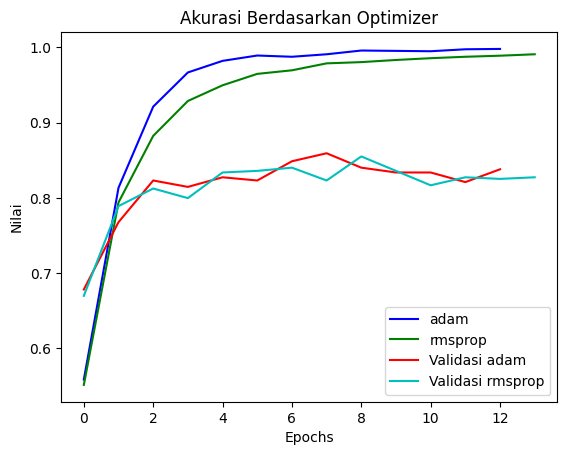

<Figure size 20000x20000 with 0 Axes>

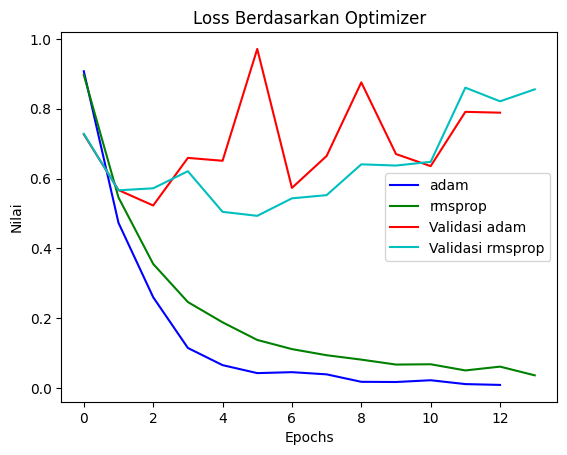

<Figure size 20000x20000 with 0 Axes>

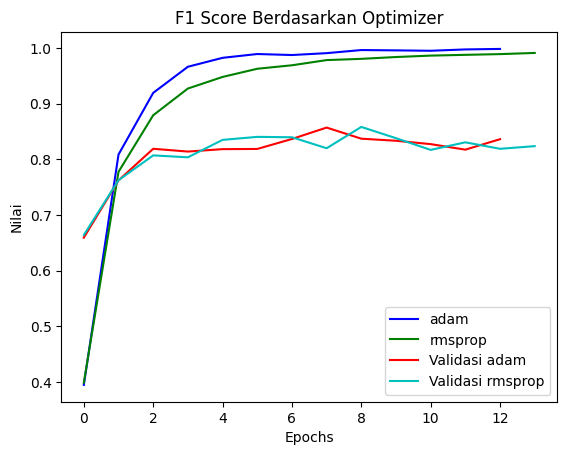

<Figure size 20000x20000 with 0 Axes>

In [20]:
def compareAccuracy(result,optimizer):
    plt.plot(result[0].history['accuracy'],color='b',label='{}'.format(optimizer[0]))
    plt.plot(result[1].history['accuracy'],color='g',label='{}'.format(optimizer[1]))
    plt.plot(result[0].history['val_accuracy'],color='r',label='Validasi {}'.format(optimizer[0]))
    plt.plot(result[1].history['val_accuracy'],color='c',label='Validasi {}'.format(optimizer[1]))
    plt.xlabel("Epochs")
    plt.ylabel("Nilai")
    plt.title("Akurasi Berdasarkan Optimizer")
    plt.legend()
    plt.figure(figsize=(200 ,200))
    plt.show()
compareAccuracy(result,optimizer)
def compareLoss(result,optimizer):
    plt.plot(result[0].history['loss'],color='b',label='{}'.format(optimizer[0]))
    plt.plot(result[1].history['loss'],color='g',label='{}'.format(optimizer[1]))
    plt.plot(result[0].history['val_loss'],color='r',label='Validasi {}'.format(optimizer[0]))
    plt.plot(result[1].history['val_loss'],color='c',label='Validasi {}'.format(optimizer[1]))
    plt.xlabel("Epochs")
    plt.ylabel("Nilai")
    plt.title("Loss Berdasarkan Optimizer")
    plt.legend()
    plt.figure(figsize=(200 ,200))
    plt.show()
compareLoss(result,optimizer)
def compareF1Score(result,optimizer):
    plt.plot(result[0].history['f1_m'],color='b',label='{}'.format(optimizer[0]))
    plt.plot(result[1].history['f1_m'],color='g',label='{}'.format(optimizer[1]))
    plt.plot(result[0].history['val_f1_m'],color='r',label='Validasi {}'.format(optimizer[0]))
    plt.plot(result[1].history['val_f1_m'],color='c',label='Validasi {}'.format(optimizer[1]))
    plt.xlabel("Epochs")
    plt.ylabel("Nilai")
    plt.title("F1 Score Berdasarkan Optimizer")
    plt.legend()
    plt.figure(figsize=(200 ,200))
    plt.show()
compareF1Score(result,optimizer)

In [21]:
for i in range(len(models)):
    temp=models[i].evaluate(x_test,y_test)
    print('model dengan optimizer {} mendapatkan matrix evaluasi '.format(optimizer[i]),temp)

17/17 [==============================] - 0s 13ms/step - loss: 0.6350 - accuracy: 0.8157 - f1_m: 0.8204
model dengan optimizer adam mendapatkan matrix evaluasi  [0.6350417137145996, 0.8157389760017395, 0.8204213380813599]
17/17 [==============================] - 0s 16ms/step - loss: 0.7578 - accuracy: 0.8445 - f1_m: 0.8471
model dengan optimizer rmsprop mendapatkan matrix evaluasi  [0.7578050494194031, 0.8445297479629517, 0.8470896482467651]


In [22]:
models[0].save('./Model/Simple/Optimizer/adam.h5')
models[1].save('./Model/Simple/Optimizer/rmsprop.h5')

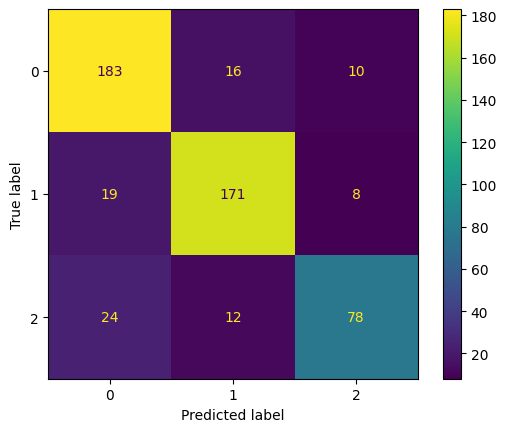

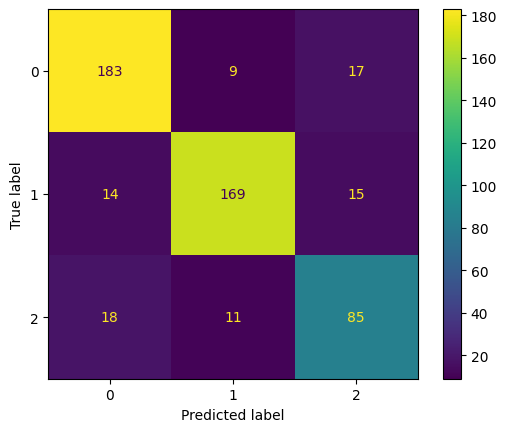

In [38]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
for item in models:
    predict=item.predict(x_test)
    confusion=confusion_matrix(np.argmax(y_test,axis=1),np.argmax(predict,axis=1))
    display=ConfusionMatrixDisplay(confusion_matrix=confusion)
    display.plot()

In [39]:
optimizer=['adam','rmsprop']
result_complex=[]
models_complex=[]
for item in optimizer:
    print('Train model with {} optimizer'.format(item))
    model=createComplexModel(optimizer=item)
    history=model.fit(x_train,y_train,epochs=20,validation_split=0.1,callbacks=[callback])
    models_complex.append(model)
    result_complex.append(history)

Train model with adam optimizer
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 15, 128)           895360    
                                                                 
 bidirectional_5 (Bidirectio  (None, 15, 256)          263168    
 nal)                                                            
                                                                 
 bidirectional_6 (Bidirectio  (None, 15, 256)          394240    
 nal)                                                            
                                                                 
 bidirectional_7 (Bidirectio  (None, 15, 256)          394240    
 nal)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 3840)              0         
                      

In [40]:
for i in range(len(models_complex)):
    temp=models_complex[i].evaluate(x_test,y_test)
    print('model dengan optimizer {} mendapatkan matrix evaluasi '.format(optimizer[i]),temp)

17/17 [==============================] - 1s 37ms/step - loss: 0.6145 - accuracy: 0.8964 - f1_m: 0.8990
model dengan optimizer adam mendapatkan matrix evaluasi  [0.614516019821167, 0.8963531851768494, 0.8990137577056885]
17/17 [==============================] - 1s 37ms/step - loss: 0.3635 - accuracy: 0.8848 - f1_m: 0.8888
model dengan optimizer rmsprop mendapatkan matrix evaluasi  [0.3634621798992157, 0.8848368525505066, 0.8887892365455627]


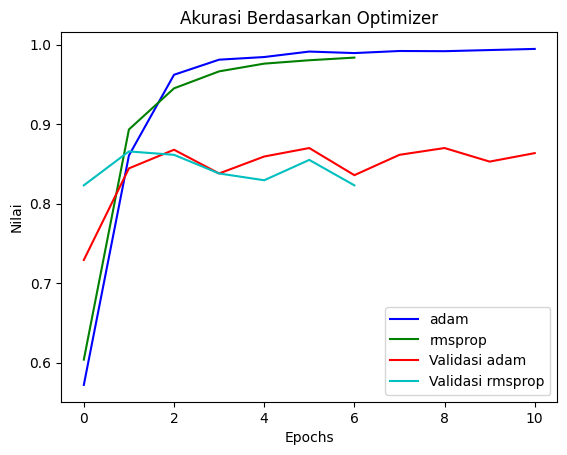

<Figure size 20000x20000 with 0 Axes>

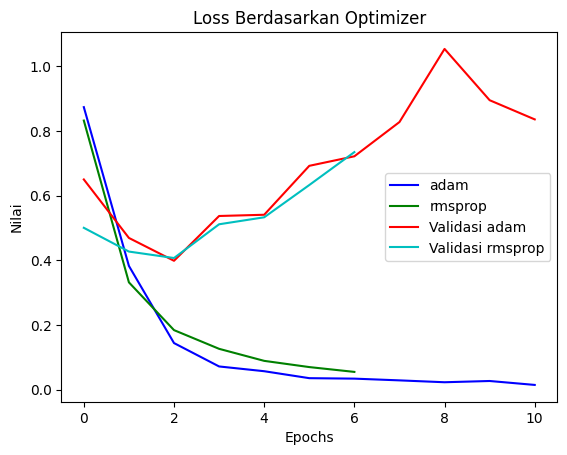

<Figure size 20000x20000 with 0 Axes>

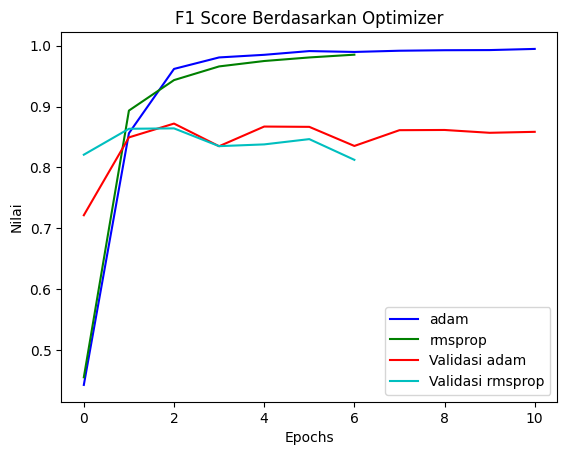

<Figure size 20000x20000 with 0 Axes>

In [41]:
def compareAccuracy(result,optimizer):
    plt.plot(result[0].history['accuracy'],color='b',label='{}'.format(optimizer[0]))
    plt.plot(result[1].history['accuracy'],color='g',label='{}'.format(optimizer[1]))
    plt.plot(result[0].history['val_accuracy'],color='r',label='Validasi {}'.format(optimizer[0]))
    plt.plot(result[1].history['val_accuracy'],color='c',label='Validasi {}'.format(optimizer[1]))
    plt.xlabel("Epochs")
    plt.ylabel("Nilai")
    plt.title("Akurasi Berdasarkan Optimizer")
    plt.legend()
    plt.figure(figsize=(200 ,200))
    plt.show()
compareAccuracy(result_complex,optimizer)
def compareLoss(result,optimizer):
    plt.plot(result[0].history['loss'],color='b',label='{}'.format(optimizer[0]))
    plt.plot(result[1].history['loss'],color='g',label='{}'.format(optimizer[1]))
    plt.plot(result[0].history['val_loss'],color='r',label='Validasi {}'.format(optimizer[0]))
    plt.plot(result[1].history['val_loss'],color='c',label='Validasi {}'.format(optimizer[1]))
    plt.xlabel("Epochs")
    plt.ylabel("Nilai")
    plt.title("Loss Berdasarkan Optimizer")
    plt.legend()
    plt.figure(figsize=(200 ,200))
    plt.show()
compareLoss(result_complex,optimizer)
def compareF1Score(result,optimizer):
    plt.plot(result[0].history['f1_m'],color='b',label='{}'.format(optimizer[0]))
    plt.plot(result[1].history['f1_m'],color='g',label='{}'.format(optimizer[1]))
    plt.plot(result[0].history['val_f1_m'],color='r',label='Validasi {}'.format(optimizer[0]))
    plt.plot(result[1].history['val_f1_m'],color='c',label='Validasi {}'.format(optimizer[1]))
    plt.xlabel("Epochs")
    plt.ylabel("Nilai")
    plt.title("F1 Score Berdasarkan Optimizer")
    plt.legend()
    plt.figure(figsize=(200 ,200))
    plt.show()
compareF1Score(result_complex,optimizer)

In [44]:
models_complex[0].save('./Model/Complex/Optimizer/adam.h5')
models_complex[1].save('./Model/Complex/Optimizer/rmsprop.h5')